<font face="Times New Roman" size="3">
<hr style="width:100%;height:2px;color:black">
<div style="width:100%">
    <div style="float:left;width:50%">Albert-Ludwigs-Universität Freiburg</div>
    <div style="float:left;width:50%;text-align:right">Wintersemester 2022/23</div> 
</div>
<div style="clear:both;text-align:center">
    <h1 style="margin-top:20px;padding:0px">Datenanalyse für Naturwissenschaftler*Innen</h1>
    <h2 style="margin:5px;padding:0px">Statistische Methoden in Theorie und Praxis</h2>
    Vorlesung: Dr. Andrea Knue<br />
    Übungsleitung: Dr. Constantin Heidegger<br />
    <h1 style="margin:10px;padding:0px">Musterlösung 6</h1>
    Ausgabe: 25. November 2022 10:00 Uhr, Abgabe: 2. Dezember 2022 bis 10:00 Uhr via Ilias
</div>
<hr style="font-family:width:100%;height:2px;color:black">
</font>

<font face="Times New Roman" size=3>
    <h3 style="margin:0px">Aufgabe 3: Zufallszahlengeneratoren (12P)</h3>
</font>

In dieser Aufgabe werden wir verschiedene Generatoren von Zufallszahlen genauer kennenlernen.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

<font face="Times New Roman" size=4>
a) Der allgemeine linear-kongruente Generator (2P)
</font>

Schreiben Sie zunächst eine Funktion `ALCG`, die einen allgemeinen linear-kongruenten Generator darstellt, welcher in der Vorlesung diskutiert wurde. Dieser Generator soll mit den Parametern `a`, `c` und `m` aufgerufen werden, und weiterhin von der Saatzahl `I0` und der Zahl der zu generierenden Zufallszahlen `N` abhängen. Die Funktion soll eine Liste der Zufallszahlen zurückgeben. 

In [2]:
def ALCG(a:int, c:int, m:int, I0:int, N:int) -> list[int]:
    x = []
    x.append(I0)
    for i in range(0, N):
        alt = x[i] 
        neu = (a*alt + c) % m # % ist der Modulo-Operator!
        x.append(neu)
    return x

<font face="Times New Roman" size=4>
b) Gleichverteile Zufallszahlen (2P)
</font>

Generieren Sie nun eine Liste mit 100 Zufallszahlen mit den folgenden Werten: `a=11`, `c=0`, `m=64`. Wandeln Sie diese Werte in gleichverteilte Zufallszahlen $z_i$ im Intervall $[0,1]$ um. Ferner, erstellen Sie einen Scatterplot indem Sie die Zufallszahl $z_i$ als Funktion der vorherigen Zahl $z_{i-1}$ plotten (also $x=z_{i-1}$ und $y=z_i$). Was stellen Sie fest? 

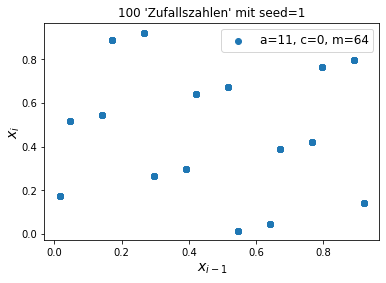

In [3]:
a=11
c=0
m=64
I0=1
N=100

Iwerte = ALCG(a, c, m, I0, N)
x = np.array(Iwerte)/m ## Normierung auf [0,1]

#x=z_{i-1} 
xdata = x[0:N-1]
#y=z_i
ydata = x[1:N]

# Scatterplot erstellen
plt.title(f"{N} 'Zufallszahlen' mit seed={I0}" )
plt.scatter(xdata, ydata, label=f"a={a}, c={c}, m={m}")
plt.xlabel("$x_{i-1}$", fontsize=14)
plt.ylabel("$x_{i}$"  , fontsize=14, labelpad=0) 
plt.legend(fontsize=12, loc="upper right")
#plt.savefig('Test.png')
plt.show()

In [4]:
print(f'Es gibt {len(x)} "Zufallszahlen".\n' +
        f'wobei es nur {len(np.unique(x))} verschiedene Werte auftreten.')

Es gibt 101 "Zufallszahlen".
wobei es nur 16 verschiedene Werte auftreten.


Obwohl 101 Zahlen generiert werden, nehmen diese nur 16 verschiedene Werte an. --> der ALCG ist periodisch.

<font face="Times New Roman" size=4>
c) Randu Generator (2P)
</font>

Nun wollen wir den "berüchtigten" Randu Generator, der von IBM in den 1960er Jahren entwickelt wurde, implementieren. Verwenden Sie dazu die Funktion die Sie in Aufgabenteil (a) geschrieben haben mit den folgenden Parametern: `a=65539`, `c=0` und `m=2^31` und generieren Sie 10000 Zufallszahlen. Plotten Sie wieder $z_i$ als Funktion von $z_{i-1}$ wie zuvor. Was sehen Sie nun? Wie würden Sie die Qualität des Randu Generators anhand dieses Plots bewerten? 

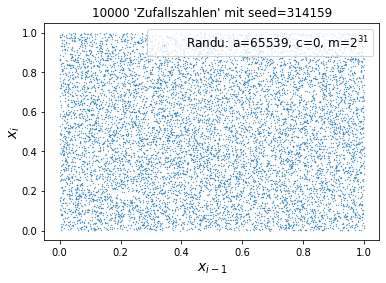

In [5]:
a=65539
c=0
m=pow(2, 31)
I0=314159
N=10000

Iwerte = ALCG(a, c, m, I0, N)
x_RG = np.array(Iwerte)/m ## Normierung auf [0,1]

#x=z_{i-1} 
xdata = x_RG[0:N-1]
#y=z_i
ydata = x_RG[1:N]

#plt.scatter(xbefore, xcurrent, label="Randu", s=0.1)
plt.title(f"{N} 'Zufallszahlen' mit seed={I0}" )
plt.scatter(xdata, ydata, s=0.1, 
            label=fr"Randu: a={a}, c={c}, m=$2^{{31}}$")
plt.xlabel("$x_{i-1}$", fontsize=14)
plt.ylabel("$x_{i}$", fontsize=14, labelpad=0) 
plt.legend(fontsize=12, loc="upper right")
#plt.savefig('TestRandu.png')
plt.show()

<font face="Times New Roman" size=4>
d) Mersenne-Twister Algorithmus (1P)
</font>

Erstellen Sie den gleichen Plot wie in (c), nur nehmen Sie nun 10000 gleichverteilte Zufallszahlen die sie mit der `numpy.random` Funktion erstellt haben (Mersenne-Twister Algorithmus). Erkennen Sie einen Unterschied zu dem Plot für den Randu Generator aus Teil (c)? 

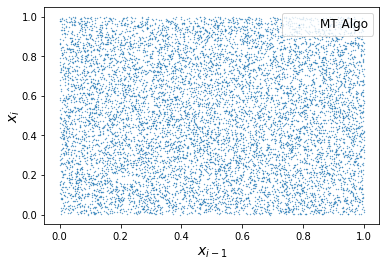

In [6]:
x_MT = np.random.uniform(0, 1, 10000)

#x=z_{i-1} 
xdata = x_RG[0:N-1]
#y=z_i
ydata = x_RG[1:N]

plt.scatter(xdata, ydata, label="MT Algo", s=0.1)
plt.xlabel("$x_{i-1}$", fontsize=14)
plt.ylabel("$x_{i}$", fontsize=14, labelpad=0) 
plt.legend(fontsize=12, loc="upper right")
#plt.savefig('TestRandu.png')
plt.show()

<font face="Times New Roman" size=4>
e) Diagonale Darstellung (3P)
</font>

Nun wollen wir uns die mit dem Randu Generator erstellten Zufallszahlen anders darstellen. Dazu addieren Sie immer die drei aufeinander folgenden Glieder des Arrays folgendermaßen: $z_{sum} = 9z_i-6z_{i+1}+z_{i+2}$. Plotten Sie diese Summe als Funktion von $z_i$. Machen Sie das gleiche mit den Zufallszahlen der `numpy.random` Funktion aus Teil (d). Was stellen Sie fest wenn Sie die beiden Scatterplots vergleichen?

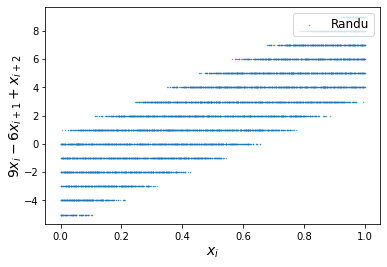

In [7]:

## z_{sum} = 9z_i-6z_{i+1}+z_{i+2}
# z_i
xi1 = x_RG[0:N-2]
# z_{i+1}
xi2 = x_RG[1:N-1]
# z_{i+2}
xi3 = x_RG[2:N]
# 9x − 6y + z 
xsum_RG = (9*xi1-6*xi2+xi3)

plt.scatter(xi1, xsum_RG, label="Randu", s=0.1)
plt.xlabel("$x_{i}$", fontsize=14)
plt.ylabel("$9x_{i}-6x_{i+1}+x_{i+2}$", fontsize=14, labelpad=0) 
plt.legend(fontsize=12, loc="upper right")
#plt.savefig('TestRandu_Summed.png')
plt.show()

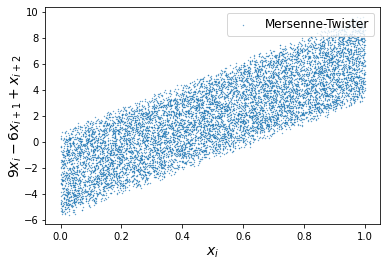

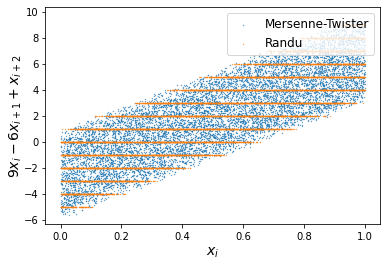

In [8]:
xi1_MT = x_MT[0:N-2]
xi2_MT = x_MT[1:N-1]
xi3_MT = x_MT[2:N]

xsum_MT = (9*xi1_MT-6*xi2_MT+xi3_MT)

# plot data
plt.scatter(xi1_MT, xsum_MT, label="Mersenne-Twister", s=0.1)
plt.xlabel("$x_{i}$", fontsize=14)
plt.ylabel("$9x_{i}-6x_{i+1}+x_{i+2}$", fontsize=14, labelpad=0) 
plt.legend(fontsize=12, loc="upper right")
#plt.savefig('Test_MersenneTwister_Summed.png')
plt.show()

# compare the two generators
plt.scatter(xi1_MT, xsum_MT, label="Mersenne-Twister", s=0.1)
plt.scatter(xi1, xsum_RG, label="Randu", s=0.1)
plt.xlabel("$x_{i}$", fontsize=14)
plt.ylabel("$9x_{i}-6x_{i+1}+x_{i+2}$", fontsize=14, labelpad=0) 
plt.legend(fontsize=12, loc="upper right")
#plt.savefig('Test_MersenneTwister_Summed.png')
plt.show()

<font face="Times New Roman" size=4>
f) Summierte Werte und Fazit (2P)
</font>

Geben Sie ein paar der summierten Werte aus, sowohl für Randu als auch für `numpy.random`. Was stellen Sie fest? Wie bewerten Sie die \"Zufaelligkeit\" der beiden Generatoren nun?

In [9]:
# für Randu: wir sehen nur Integer-Werte! Lest euch für die Übung nochmal das hier durch: 
# https://en.wikipedia.org/wiki/RANDU -- das erklärt nochmal warum Randu so schlecht ist!
for i in range(0, 10):
    print(xsum_RG[i])

-3.0
3.0
0.0
6.0
-1.0
6.0
1.0
3.0
2.0
6.0


In [10]:
# für numpy.random
for i in range(0, 10):
    print(xsum_MT[i])

4.38305207923178
0.571711876891024
-0.5193221281511828
7.419475690063598
-1.5738255382268067
7.270072479320827
-0.8781826367537291
2.3506884369906254
0.972441751510106
0.12703525073845312


<hr style="font-family:width:100%;height:2px;color:black">

<font face="Times New Roman" size=3>
    <h3 style="margin:0px">Aufgabe 4: "Crude" Monte-Carlo Integration (4P)</h3>
</font>

In dieser Aufgabe werden wir eine einfache Abschätzung für das Integral einer Funktion $f(x)$ berechnen (manche Funktionen sind so komplex, dass sie nicht analytisch sondern nur numerisch integriert werden können). Dazu verwenden wir die "Crude" Monte-Carlo Integration, die wir in Vorlesung 8 kennengelernt haben. 

<font face="Times New Roman" size=4>
a) Integrationsfunktion (2P)
</font>

Wenden Sie diese Methode auf eine Gaußfunktion mit Mittelwert 3 und Standardabweichung 1 an. Das Integral soll zwischen $-\sigma$ und $+\sigma$ bestimmt werden. Schreiben Sie eine Funktion `crudeIntegral`, welche Ihnen das Integral für eine Stichprobengröße $N$ zurueckgibt. Setzen Sie dazu das Random-Seed auf 13575 um die Ergebnisse reproduzierbar zu machen. 

In [11]:
def crudeIntegral(N : int, mu : float = 3, sigma : float = 1, seed : int = 13575) -> np.float:
    np.random.seed(seed)
    xmin = mu-sigma
    xmax = mu+sigma
    x  = np.random.uniform(xmin, xmax, N)
    gauss = 1 / np.sqrt(2*np.pi*sigma**2) * np.exp(-(x-mu)**2/(2*sigma**2))
    Integral = (xmax-xmin) * np.sum(gauss) / N
    return Integral

<ipython-input-11-cee7d942858f>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  def crudeIntegral(N : int, mu : float = 3, sigma : float = 1, seed : int = 13575) -> np.float:


<font face="Times New Roman" size=4>
b) Resultat (2P)
</font>

Führen Sie die Berechnung für alle gegebenen Werte in `NValues` durch, und zeichnen Sie die berechneten Integrale als Funktion von der Stichprobenanzahl $N$ in ein Diagramm ein. Fügen Sie in diesem Diagramm auch den wahren Wert als horizontale Line in den Plot ein und beschriften Sie alles entsprechend (Achsen und Legende). Um eine horizontale Linie zu zeichnen, können Sie die Methode `plt.axhline` verwenden. Wählen Sie für die $x$-Achse eine logarithmische Auftragung mit der Funktion `set_xscale`. Was stellen Sie fest?

In [12]:
NValues   = [10,20,30,40,50,60,70,80,90, 100, 1000, 10000, 100000, 1000000, pow(10,7)]
Integrals = []

In [13]:
# create array
for N in NValues:
    Integrals.append(crudeIntegral(N))

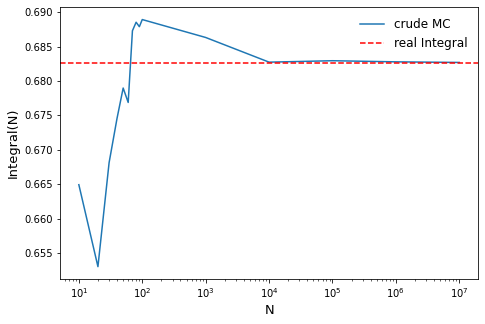

In [14]:
# create plot with subplots
fig = plt.figure(figsize=(7.5, 5))
ax = fig.add_subplot()
ax.plot(np.array(NValues), np.array(Integrals), label="crude MC")
ax.axhline(y=0.6826, xmin=0.0, xmax=1.0, c='red', ls='--', label="real Integral")
ax.set_xlabel("N", fontsize=13)
ax.set_ylabel("Integral(N)", fontsize=13) 
ax.legend(fontsize=12, frameon=False)
ax.set_xscale('log')
#plt.savefig("Integral_N.png")
plt.show()

**Kommentar: für die Bewertung immer miteinbeziehen, ob die Achsen und Legenden beschriftet wurden!!!**  
                **diese Lösung zeigt nur den Code. Die Fragen wurden nicht vollständig beantwortet**
